## **1. Installation**

In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/pysource7/Mask_RCNN
import sys
sys.path.append("/content/Mask_RCNN/demo")
from train_mask_rcnn_demo import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1053, done.
remote: Total 1053 (delta 0), reused 0 (delta 0), pack-reused 1053
Receiving objects: 100% (1053/1053), 125.29 MiB | 29.37 MiB/s, done.
Resolving deltas: 100% (621/621), done.
VERS 0.2


Using TensorFlow backend.


... done downloading pretrained model!


In [2]:
!nvidia-smi

Mon Nov  8 10:00:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **2. Run Mask-RCNN on Images**

You can load here the image and extract the mask using Mask-RCNN


In [13]:
# Load Image
img = cv2.imread("/content/gdrive/MyDrive/stacksegmentation/frontal.png")


test_model, inference_config = load_inference_model(1,"/content/gdrive/MyDrive/stacksegmentation/mask_rcnn_object_0002.h5")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]


Loading weights from  /content/gdrive/MyDrive/stacksegmentation/mask_rcnn_object_0002.h5


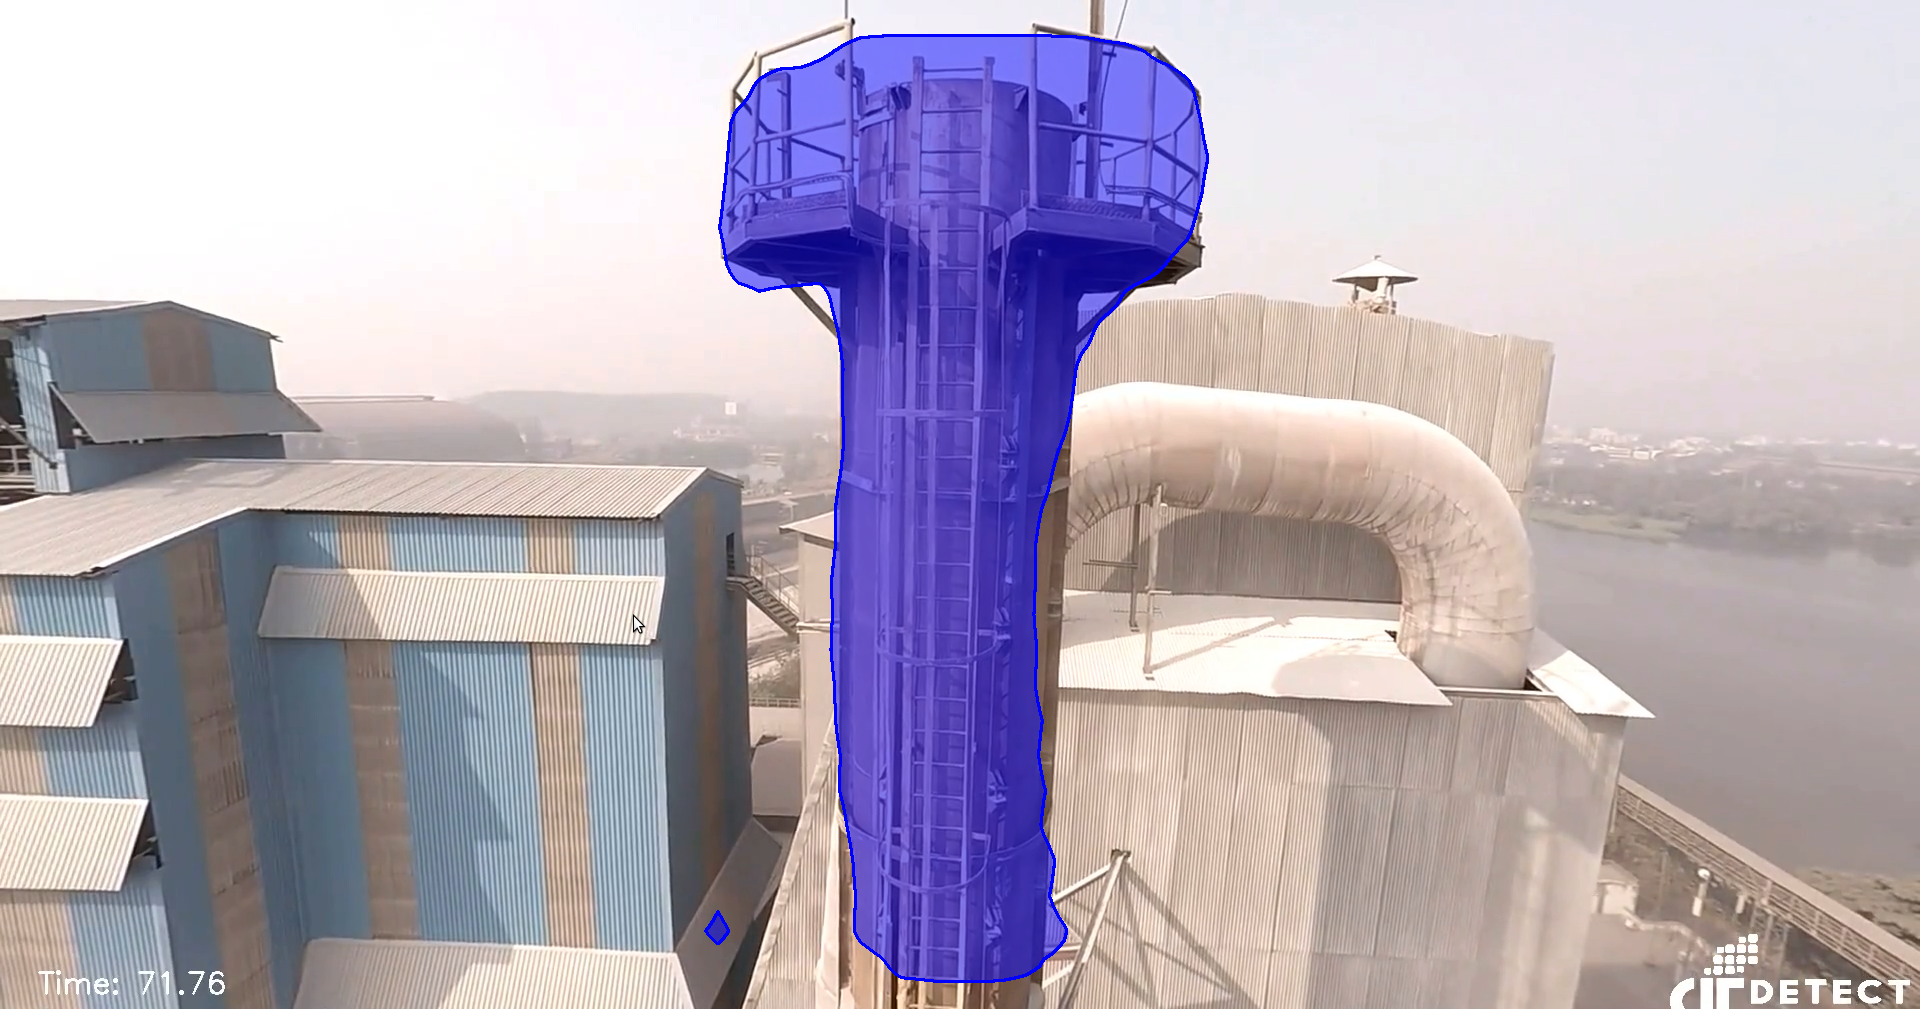

In [14]:
from mrcnn.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow
num_classes = 1
object_count = len(r["class_ids"])
colors = random_colors(num_classes)

for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 2)
        img = draw_mask(img, [cnt], colors[i])
cv2_imshow(img)